# Projet de prediction de l'état diabetique d'un patient

## Objectif: Mise en place des algorithmes de machine learnig permettant de predire si un patient sera diabétique ou non en fonction de ses antécédents médicaux et démographique


## Description du jeu de données 

L' ensemble de données de prédiction du diabète est une collection de données
médicales et démographiques sur les patients, ainsi que leur statut diabétique (positif ou
négatif). Les données comprennent des caractéristiques telles que l’âge, le sexe, l’indice de
masse corporelle (IMC), l’hypertension, les maladies cardiaques, les antécédents de
tabagisme, le taux d’HbA1c et la glycémie.

- gender : Genre du patient (variable categorielle: Female et Male)
- age: l'age du patient (numerique)
- Hypertension : designe si le patient a l'hypertension ou non (logique)
- heart_disease: indique si le patient est cardiaque ou non (logique)
- smoking_history : Etat tabagiste du patient (categorielle)
- bmi: Indice de masse corporelle (numerique)
- HbA1c_level: Taux de glycémie (numérique)
- blood_glucose_level: Taux de glucose dans le sang (numérique)
- diabetes: Etat diabétique du patient (logique)


# Objectif analytique

- Prédire l'état diabétique du patient à l'aide des autres variables.
- Variable cible ou targuet: diabetes
- Variables explicatives ou futures: Toutes les autres variables exceptées diabète 

# Analyse préliminaire du jeu de données 

- Le jeu de données contient 100000 enregistrement pour 9 variables


In [6]:
# Importation des modules élémentaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Jeu de donnees
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
# Dimensions du jeu de données
df.shape

(100000, 9)

Le jeu de données conténant des informations médicales sur des patients contient 100000 enregistrement avec 9 variables.

In [9]:
# Examen des types de variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Résumé du jeu de données

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- Le jeu de données ne contient aucune donnée manquantes

Commentaire sur les variables numériques
- L'âge moyen des patients est de 42 ans. Age min est moins d'un an alors que l'age max est 80 ans. . 25% des patient sont jeunes, c'est à dire moins de 24 ans. . La moitié des patients a au plus 43 ans. . 25% des patients sont des vieux.
- L'indice de masse corporelle moyen est 27.32, le min est 10.1 et le max est 95.69: il ya donc des indice anormalement élévés


# Nettoyage des données

## Recodage des variables

In [12]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [13]:
df["gender"]= df["gender"].replace(['Female', 'Male','Other'], ["0", "1", "2"])
df["gender"].unique()

array(['0', '1', '2'], dtype=object)

In [14]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [15]:
df["smoking_history"]= df["smoking_history"].replace(['never', 'current','former', 'ever','not current', 'No Info'], ["0", "1", "2","3","4","5"])
df["smoking_history"].unique()

array(['0', '5', '1', '2', '3', '4'], dtype=object)

In [16]:
# Conversion des variables logique en categorielle

cols=["hypertension", "heart_disease", "diabetes"]
for col in cols:
    df[col]=df[col].astype("object")
    print(df[col].unique())


[0 1]
[1 0]
[0 1]


In [17]:
df["blood_glucose_level"]=df["blood_glucose_level"].astype("float")

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140.0,0
1,0,54.0,0,0,5,27.32,6.6,80.0,0
2,1,28.0,0,0,0,27.32,5.7,158.0,0
3,0,36.0,0,0,1,23.45,5.0,155.0,0
4,1,76.0,1,1,1,20.14,4.8,155.0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
 8   diabetes             100000 non-null  object 
dtypes: float64(4), object(5)
memory usage: 6.9+ MB


# Etude statistique

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00


- En moyenne les patients sont agés de 42 ans. l'age max est 80 et l'age min est 0.08. L'écart moyen est 23 ans
- L'indice de masse moyen est 27.32, le min est 10.01 et le max est 95.69 avec un ecart moyen de 6.64
- Le taux de glycémie moyen est 5.53, le min est 3.5 et le max est 9 avec un ecart moyen de 1.07
- Le taux de glucose moyen est 138, le min est 80 et le max est 300 avec un ecart moyen de 40.71

In [21]:
freq=df.select_dtypes("object").describe().T
freq["freq_prop"]= (freq["freq"]/100000)*100
print(freq)

                  count unique top   freq freq_prop
gender           100000      3   0  58552    58.552
hypertension     100000      2   0  92515    92.515
heart_disease    100000      2   0  96058    96.058
smoking_history  100000      6   5  35816    35.816
diabetes         100000      2   0  91500      91.5


In [22]:
col_num = list(df.select_dtypes([float,int]).columns)
col_cat = list(df.select_dtypes([object,"category"]).columns)

In [23]:
print(col_num)
print(col_cat)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


## Distribution de probabilité des variables numériques

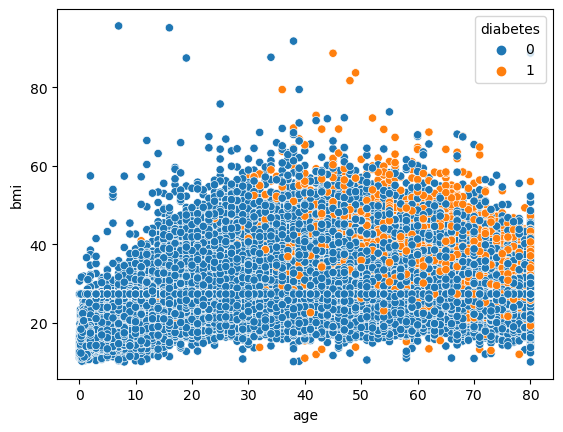

In [24]:
sns.scatterplot(data=df, x="age", y="bmi", hue="diabetes")
plt.show()

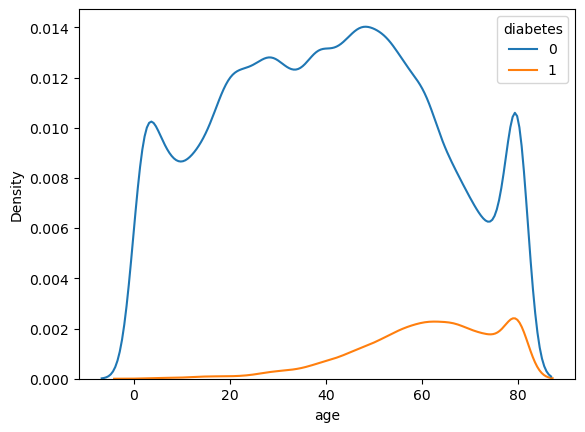

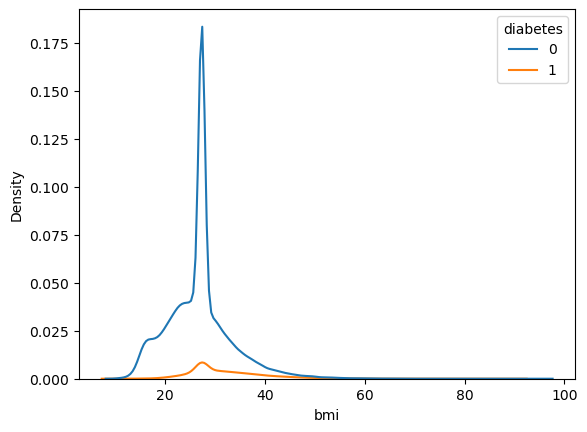

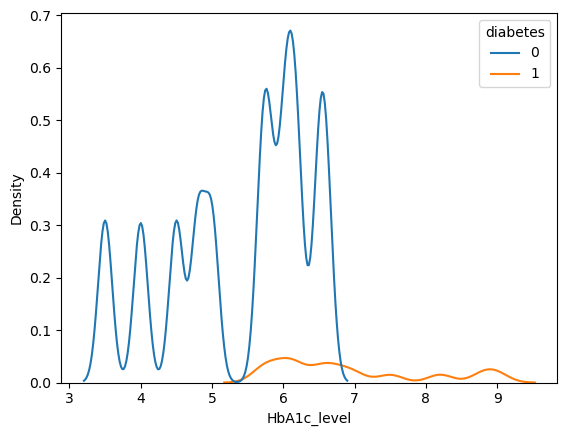

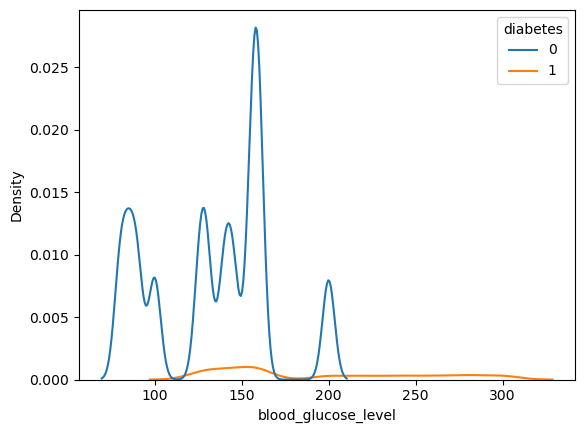

In [25]:
for var in col_num:
    #sns.histplot(data=df, x=var, bins=40)
    sns.kdeplot(data= df, x=var, hue="diabetes")
    plt.show()

In [26]:
df.groupby("diabetes")["age"].mean()

diabetes
0    40.115187
1    60.946588
Name: age, dtype: float64

In [27]:
df.groupby("diabetes")["bmi"].mean()

diabetes
0    26.887163
1    31.988382
Name: bmi, dtype: float64

In [28]:
df.groupby("diabetes")["HbA1c_level"].mean()

diabetes
0    5.396761
1    6.934953
Name: HbA1c_level, dtype: float64

In [29]:
df.groupby("diabetes")["blood_glucose_level"].mean()

diabetes
0    132.852470
1    194.094706
Name: blood_glucose_level, dtype: float64

### Interprétation 
De ces résultats, on constate que:
- Le diabète se manifeste chez les individus de plus de 60 ans
- Le taux de masse corporelle des diabetiques, le taux de glycémie et de glucose sont plus élévées chez ceux les diabetiques que chez les non diabétiques 
- En conclusion, l'état diabétique d'un individu est lié à chacun de ces variables


### Commentaire

- Au regarde des courbes de densité, on peut affirmer que l'âge, la masse corporelle, le taux de glycémie et le taux de glucose ne sont pas distribués de la mmême manière au niveau des diabétiques que au niveau des non diabétiques

## Relations entre diabète et variables catégorielles

In [30]:
df["diabetes"].value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

In [34]:
df["ind"]=1
for col in col_cat[0:4]:
    D=pd.pivot_table(data=df, index=col, columns="diabetes", values="ind",aggfunc=np.sum,margins= True,margins_name = "Total")
    #D['proportion'] = D["ind"] / D.loc['Total', 'ind']
    print(D)
    

diabetes        0       1   Total
gender                           
0         54091.0  4461.0   58552
1         37391.0  4039.0   41430
2            18.0     NaN      18
Total     91500.0  8500.0  100000
diabetes          0     1   Total
hypertension                     
0             86103  6412   92515
1              5397  2088    7485
Total         91500  8500  100000
diabetes           0     1   Total
heart_disease                     
0              88825  7233   96058
1               2675  1267    3942
Total          91500  8500  100000
diabetes             0     1   Total
smoking_history                     
0                31749  3346   35095
1                 8338   948    9286
2                 7762  1590    9352
3                 3532   472    4004
4                 5757   690    6447
5                34362  1454   35816
Total            91500  8500  100000


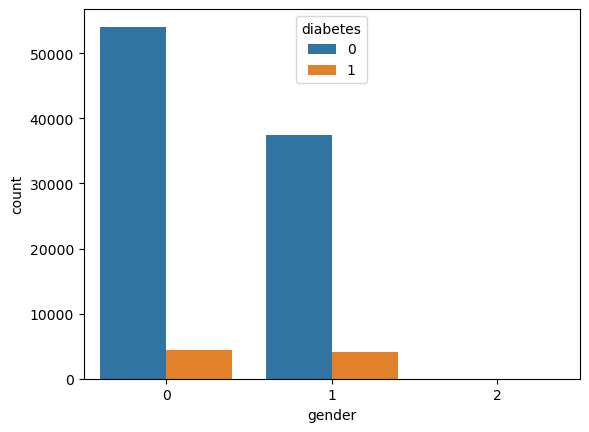

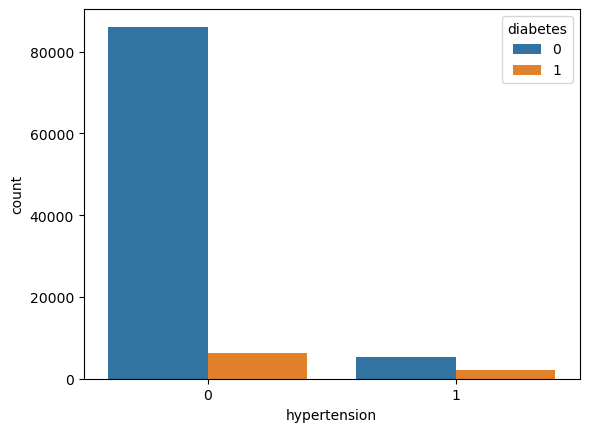

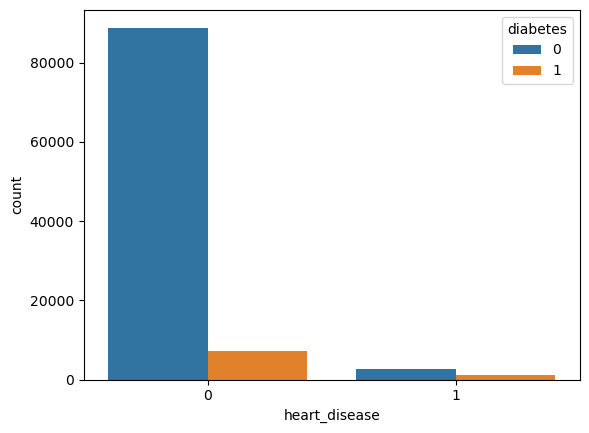

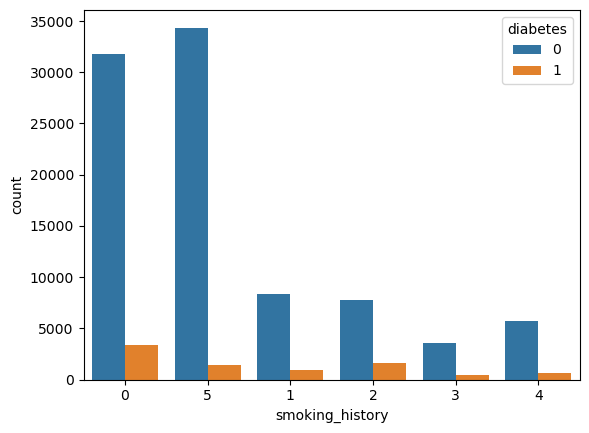

In [35]:
for col in col_cat[0:4]:
    sns.countplot(data=df, x=col, hue="diabetes")
    plt.show()

## Etude statistique

In [36]:
df[col_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00


### Commentaire sur les variables numériques

- L'âge moyen des patients est de 42 ans. Age min est moins d'un an alors que l'age max est 80 ans.
    . 25% des patient sont jeunes, c'est à dire moins de 24 ans.
    . La moitié des patients a au plus 43 ans. 
    . 25% des patients sont des vieux.
- L'indice de masse corporelle moyen est 27.32, le min est 10.1 et le max est 95.69: il ya donc des indice anormalement élévés


In [37]:
df[col_cat].describe().T

,count,unique,top,freq
gender,100000,3,0,58552
hypertension,100000,2,0,92515
heart_disease,100000,2,0,96058
smoking_history,100000,6,5,35816
diabetes,100000,2,0,91500


In [38]:
for col in col_cat:
    print(col + "--->",df[col].unique())

gender---> ['0' '1' '2']
hypertension---> [0 1]
heart_disease---> [1 0]
smoking_history---> ['0' '5' '1' '2' '3' '4']
diabetes---> [0 1]


# MODELES DE ML

In [39]:
df["diabetes"].value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

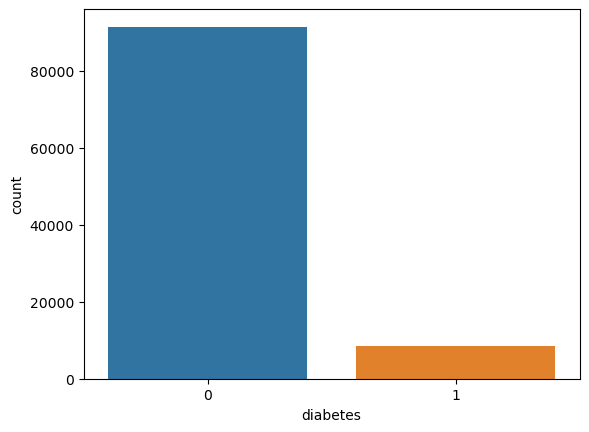

In [40]:
sns.countplot(df["diabetes"])
plt.show()

- On a 91.5% de non diabetique contre 8.5% de diabétique 
- On en déduit que les données sont déséquilibrées

# EVALUATION DES MODELES DE CLASSIFICATION 

In [41]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from xgboost import XGBClassifier

In [ ]:
# Création d'un dictionnaire de modèle

modeles ={"modelsvm": SVC()}